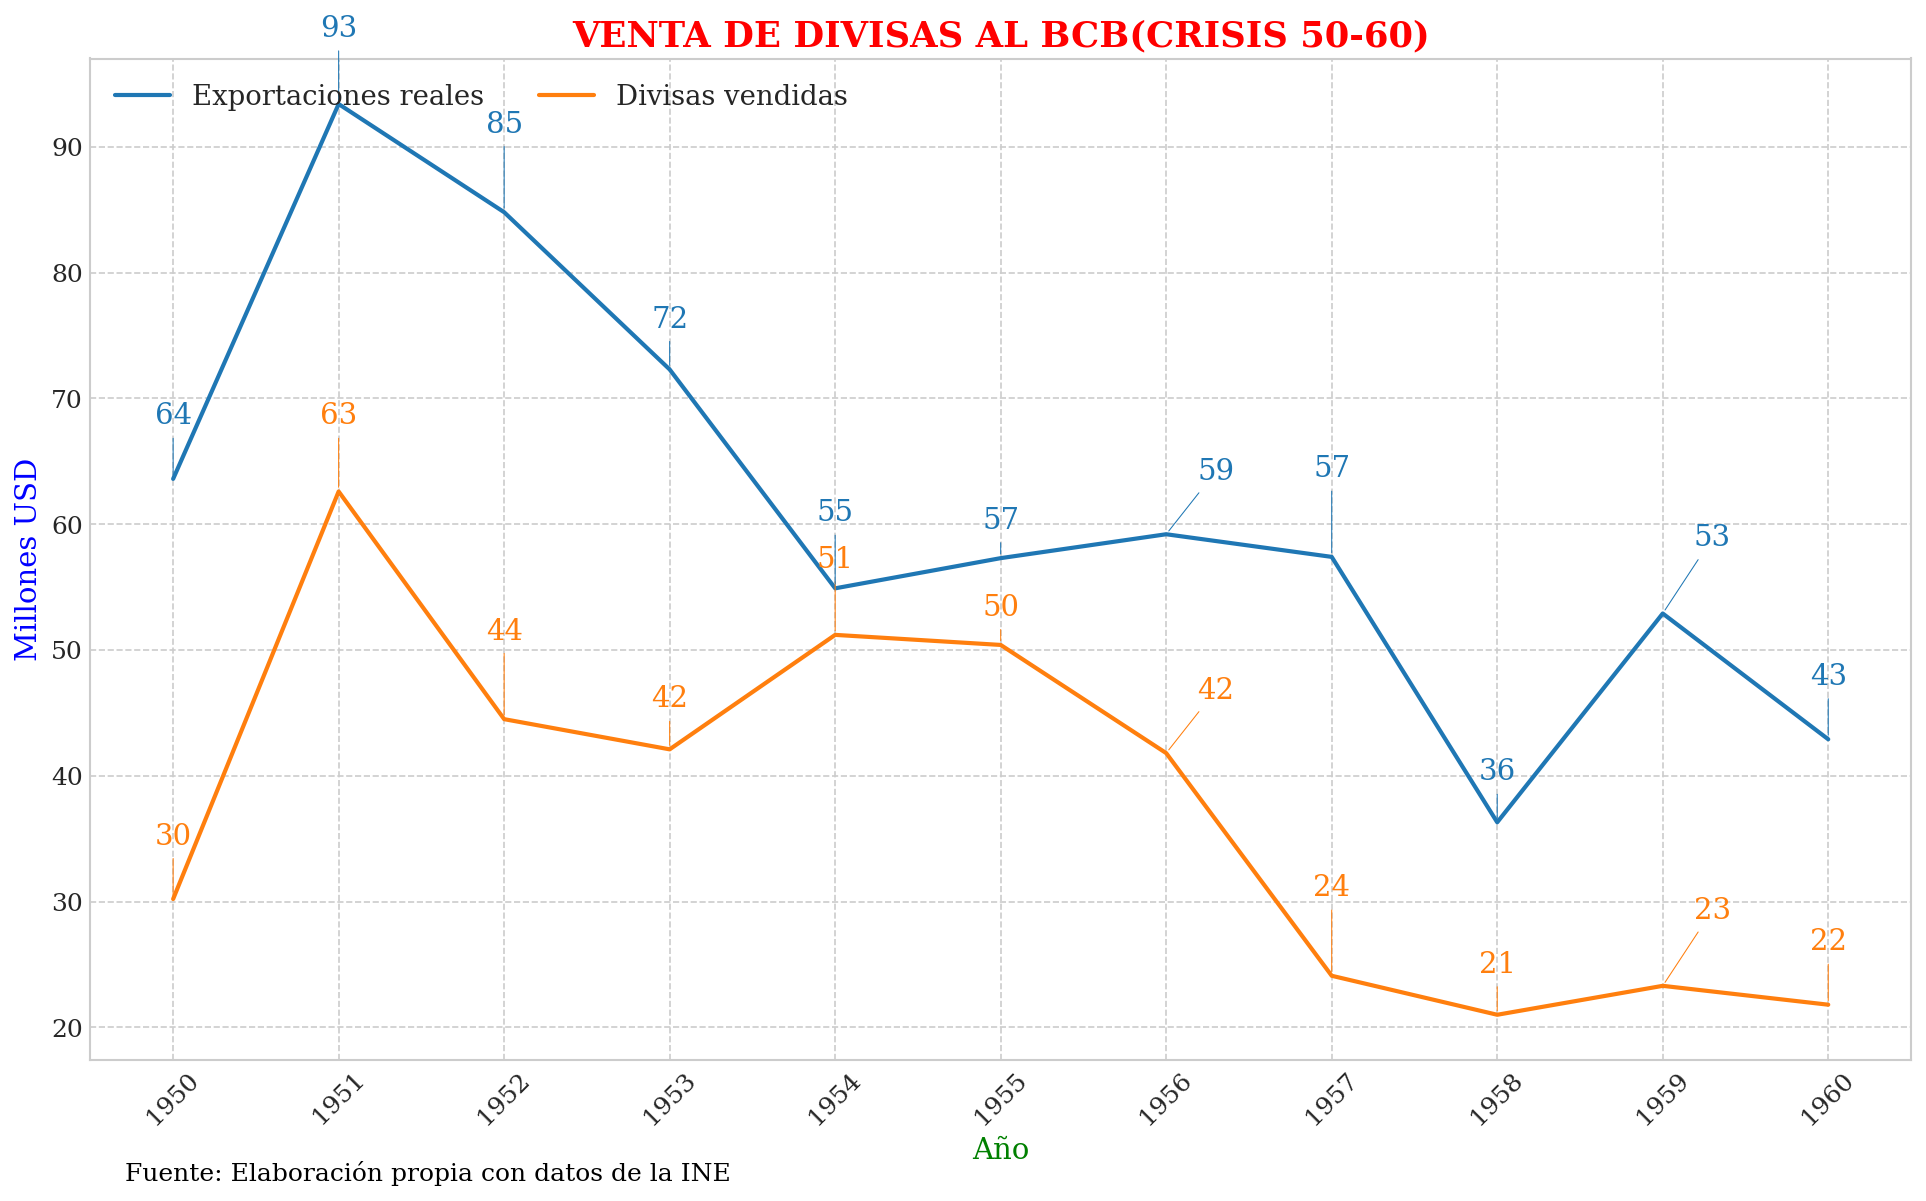

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
# carpeta raíz de assets/tesis/serie_completa para este indicador
output_dir = ASSETS_DIR / "crisis" / "venta_de_divisas_al_banco_central"
output_dir.mkdir(parents=True, exist_ok=True)

# aplica tu estilo corporativo
set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      exportaciones_reales,
      divisas_vendidas
    FROM venta_de_divisas_al_banco_central
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [
    ("exportaciones_reales", "Exportaciones reales"),
    ("divisas_vendidas",   "Divisas vendidas")
]
cols_componentes = [col for col, _ in componentes]
colors = {
    "exportaciones_reales": "#1f77b4",
    "divisas_vendidas":     "#ff7f0e"
}

# Desplazamientos para las anotaciones (dx, dy) — ajústalos según convenga
annotation_offsets = {
    "exportaciones_reales": {
        1950: (0,  5),
        1951: (0,  6),
        1952: (0,  7),
        1953: (0,  4),
        1954: (0,  6),
        1955: (0,  3),
        1956: (0.3,  5),
        1957: (0,  7),
        1958: (0,  4),  
        1959: (0.3,  6),
        1960: (0,  5),
    },
    "divisas_vendidas":     {
        1950: (0,  5),
        1951: (0,  6),
        1952: (0,  7),
        1953: (0,  4),
        1954: (0,  6),
        1955: (0,  3),
        1956: (0.3,  5),
        1957: (0,  7),
        1958: (0,  4),  
        1959: (0.3,  6),
        1960: (0,  5),
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    # omitir si no hay datos o menos de 3 puntos
    if sub.empty or len(sub) < 3:
        continue

    # años a anotar
    years_to_annot = list(sub.index)

    # inicializa figura y ejes
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"VENTA DE DIVISAS AL BCB({nombre.upper()})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Elaboración propia con datos de la INE"
    )

    # añade anotaciones de valor para cada año
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5
    )

    # guardar y mostrar
    fig.savefig(output_dir / f"venta_divisas_{nombre}.png")
    plt.show()
    plt.close(fig)
